In [11]:
import cv2
import numpy as np

In [37]:
digits = cv2.imread('../assets/digits.png',0)

In [38]:
print(digits.shape)

(1000, 2000)


In [61]:
#split the images
images = [np.hsplit(row,100) for row in np.vsplit(digits,50)]

In [40]:
images = np.array(images, dtype=np.float32)
print(images.shape)

(50, 100, 20, 20)


In [111]:
#split into train/test
train_features= images[:,:50].reshape(-1,(20*20))

test_features= images[:,50:100].reshape(-1,(20*20))

TypeError: list indices must be integers or slices, not tuple

In [53]:
#create labels
k=np.arange (10)
train_labels = np.repeat(k,250).reshape(-1,1)
test_labels = train_labels.copy()

In [54]:
#create kNN model
knn=cv2.ml.KNearest_create()

In [55]:
#train the knn model
knn.train(train_features, cv2.ml.ROW_SAMPLE,train_labels)

True

In [56]:
#use k = 3
ret, result, neighbors, dist = knn.findNearest(test_features,3)

In [57]:
matches = np.equal(result,test_labels)

matches = matches.astype(np.int)

correct = np.count_nonzero(matches)

accuracy =(correct*100.00)/result.size


In [58]:
print('Accuracy:{}'.format(accuracy))

Accuracy:91.64


In [85]:
fashion = cv2.imread('../assets/fashion.png',0)
print(fashion.shape)

(840, 840)


In [86]:
#split the images
fashionimages = [np.hsplit(row,30) for row in np.vsplit(fashion,30)]

In [87]:
fashionimages = np.array(fashionimages, dtype=np.float32)
print(fashionimages.shape)

(30, 30, 28, 28)


In [88]:
#split into train/test
train_features= fashionimages[:,:15].reshape(-1,(28*28))

test_features= fashionimages[:,15:30].reshape(-1,(28*28))

In [89]:
#create labels
k=np.arange (10)
train_labels = np.repeat(k,45).reshape(-1,1)
test_labels = train_labels.copy()

In [90]:
knn=cv2.ml.KNearest_create()

In [91]:
knn.train(train_features, cv2.ml.ROW_SAMPLE,train_labels)

True

In [92]:
ret, result, neighbors, dist = knn.findNearest(test_features,3)

In [93]:
matches = np.equal(result,test_labels)

matches = matches.astype(np.int)

correct = np.count_nonzero(matches)

accuracy =(correct*100.00)/result.size

In [94]:
print('Accuracy:{}'.format(accuracy))

Accuracy:70.88888888888889


In [95]:
digits = cv2.imread('../assets/digits.png',0)

In [96]:
print(digits.shape)

(1000, 2000)


In [104]:
#split the images
images = [np.hsplit(row,100) for row in np.vsplit(digits,50)]

In [105]:
model = cv2.ml.SVM_create()

In [106]:
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

In [107]:
model.train(train_features,cv2.ml.ROW_SAMPLE,train_labels)

True

In [108]:
result=model.predict(test_features)

In [109]:
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct =np.count_nonzero(matches)
accuracy=(correct*100.00)/result[1].size

In [110]:
print('Accuracy:{}'.format(accuracy))

Accuracy:74.66666666666667


In [116]:
#mean normaliztion
#split the images
images = [np.hsplit(row,100) for row in np.vsplit(digits,50)]
images = np.array(images, dtype=np.float32)
print(images.shape)


(50, 100, 20, 20)


In [115]:
#split into train/test
train_features= images[:,:50].reshape(-1,(20*20))

test_features= images[:,50:100].reshape(-1,(20*20))

In [117]:

train_features -=np.mean(train_features,axis=0)
test_features -=np.mean(train_features,axis=0)

In [118]:
#create labels
k=np.arange (10)
train_labels = np.repeat(k,250).reshape(-1,1)
test_labels = train_labels.copy()

In [119]:
#create kNN model
knn=cv2.ml.KNearest_create()

In [120]:
#train the knn model
knn.train(train_features, cv2.ml.ROW_SAMPLE,train_labels)

True

In [121]:
#use k = 3
ret, result, neighbors, dist = knn.findNearest(test_features,3)

In [122]:
matches = np.equal(result,test_labels)

matches = matches.astype(np.int)

correct = np.count_nonzero(matches)

accuracy =(correct*100.00)/result.size

In [123]:
print('Accuracy:{}'.format(accuracy))

Accuracy:79.24


In [181]:
#principal component analysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [182]:
mnist=  cv2.imread('../assets/digits.png',0)


In [183]:
features = np.array([np.hsplit(row,100) for row in np.vsplit(digits,50)])

In [184]:
features.shape

(50, 100, 20, 20)

In [185]:
features = features.reshape(-1,(20*20))

In [186]:
features.shape

(5000, 400)

In [187]:
pca = PCA(n_components=features.shape[1])

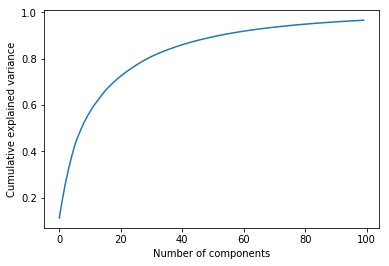

In [196]:
pca.fit(features)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [189]:
pca =PCA(n_components=100)

In [190]:
#split into train/test
train_features= images[:,:50].reshape(-1,(20*20))
test_features= images[:,50:100].reshape(-1,(20*20))

In [191]:
pca.fit(train_features)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [192]:
train_features.shape

(2500, 400)

In [193]:
train_features=pca.transform(train_features)
test_features=pca.transform(test_features)

In [194]:
train_features.shape, test_features.shape

((2500, 100), (2500, 100))

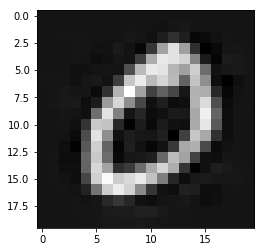

In [195]:
inverse_pca=pca.inverse_transform(train_features)
inverse_pca.shape
plt.imshow(inverse_pca[0].reshape(20,20),cmap='gray')

In [197]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'